<a href="https://colab.research.google.com/github/kani215/ML_study/blob/main/ml6_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

5.1 Linear SVM Classification

In [ ]:
import os
import numpy as np

# 일관된 출력을 위해 유사난수 초기화
np.random.seed(42)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sn
sn.set()
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
# matplotlib.rc('font', family='AppleGothic')  # MacOS
matplotlib.rc('font', family='Malgun Gothic')  # Windows
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM 분류 모델
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)


SVC(C=inf, kernel='linear')

특성치의 스케일을 조정

(-2.0, 2.0, -2.0, 2.0)

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52992 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51312 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0

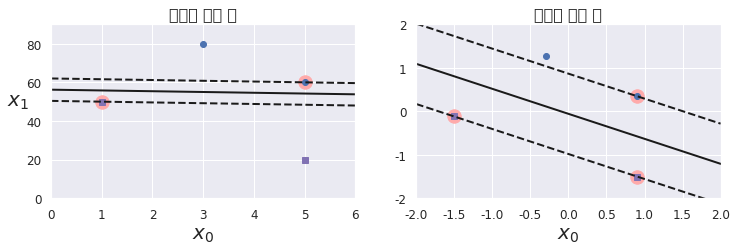

In [ ]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$  ", fontsize=20, rotation=0)
plt.title("스케일 조정 전", fontsize=16)
plt.axis([0, 6, 0, 90])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x_0$", fontsize=20)
plt.title("스케일 조정 후", fontsize=16)
plt.axis([-2, 2, -2, 2])

소프트 마진
- 이러한 여유 변수를 C라는 하이퍼파라미터를 제공한다. C는 일종의 penalty라고 볼 수 있다.
- 아래의 예제코드는 Iris(붓꽃) 데이터셋 중 Virginca 인지 아닌지 분류하는 이진 분류기를 Scikit-Learn의 LinearSVC를 이용해 구현한 코드이다. 여기서 C의 값은 1로 지정했다.

In [ ]:
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris['data'][:, (2, 3)]  # petal lenght, petal width
y = (iris['target'] == 2).astype(np.float64)  # Iris - Virginca면 1 아니면 0

svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('liear_svc', LinearSVC(C=1, loss='hinge', random_state=42))
])

svm_clf.fit(X, y)
svm_clf.predict([[5.5, 1.7]])


array([1.])

5.2 nonlinear SVM
- 선형적으로 분류할 수 없는 데이터 셋.
- 비선형 데이터 셋처리는 x = > x2처럼 차원으로 투영시키는 수법을 사용합니다.
- 두개의 반원 모양으로 데이터들이 위치한 moons 데이터 셋으로 비선형 분류 문제를 풀어봅시다.

In [4]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC

X,y = make_moons(n_samples = 100, noise=0.15)
polynomial_svm_clf = Pipeline(
    [
     ("poly_features", PolynomialFeatures(degree=3)),
     ("scaler",StandardScaler()),
     ("svm_clf", LinearSVC(C=10,loss="hinge"))
    ]
)
polynomial_svm_clf.fit(X,y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

#커널 트릭
- 실제로 특성을 추가하지 않으면서 다항식 특성을 많이 추가한 것과 같은 결과를 얻을 수 있다.


In [6]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline(
    [
     ("scaler",StandardScaler()),
     ("svm_clf",SVC(kernel="poly",degree=3,coef0=1,C=5))
    ]
)
poly_kernel_svm_clf.fit(X,y)

# d= 3 / d=10 차원 등 다항식 커널로 다양하게 분류기 제작 가능

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

- 가우시안 RBF 커널
 

In [7]:
rbf_kernel_svm_clf = Pipeline(
    [
      ("scaler",StandardScaler()),
     ("svm_clf",SVC(kernel="rbf",gamma=5,C=0.001))
    ]
)
rbf_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

In [ ]:
gamma를 증가시키면 종 모양 그래프가 좁아지며, 각 샘플의 영향 범위가 줄어든다.

#5.3 SVM 회귀

- SVM 알고리즘을 분류 아닌 회귀 형태로 사용하는 수법
- 회귀로 사용한다면 마직을 작게 하는 것이 거꾸러 유리합니다.

In [9]:
 from sklearn.svm import LinearSVR

 svm_reg = LinearSVR(epsilon=1.5)
 svm_reg.fit(X,y)

LinearSVR(epsilon=1.5)